# C-SPIKES: trialwise visualizations

This notebook demonstrates two notebook-friendly plotting utilities:
- `plot_corr_vs_sigma`: mean±SEM correlation vs filter width (`corr_sigma_ms`)
- `plot_trace_panel`: stacked fluorescence/GT/method trace panel for a representative trial


In [3]:
from pathlib import Path
import os
import sys

def find_repo_root(start: Path) -> Path:
    for p in [start, *start.parents]:
        if (p / "pyproject.toml").exists() and (p / "src" / "c_spikes").exists():
            return p
    return start

# Ensure we can import the local package without installing.
REPO_ROOT = find_repo_root(Path.cwd().resolve())
sys.path.insert(0, str(REPO_ROOT / "src"))
os.chdir(REPO_ROOT)

# Make matplotlib cache writable (HPC-friendly). Call this before importing matplotlib.
from c_spikes.viz.trialwise_plots import ensure_matplotlib_cache_dir
ensure_matplotlib_cache_dir(REPO_ROOT / "tmp" / "mpl_cache")


PosixPath('/scratch/gpfs/WANG/gerardjb/temp/C-SPIKES/tmp/mpl_cache')

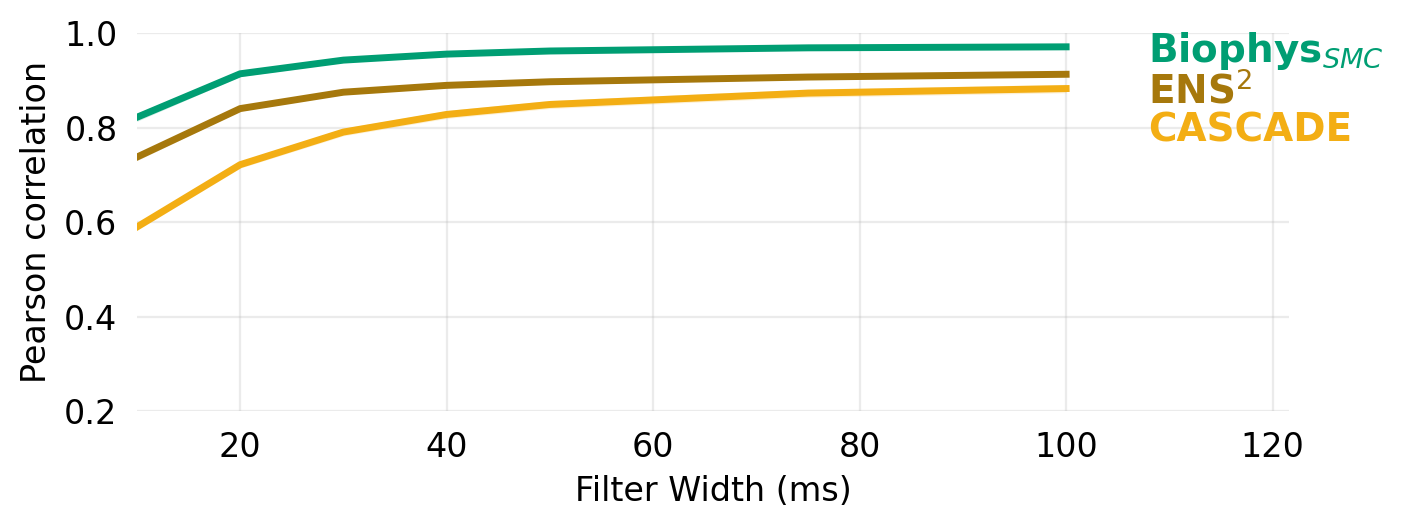

In [9]:
from c_spikes.viz.trialwise_plots import plot_corr_vs_sigma

csv_path = REPO_ROOT / "results" / "trialwise_correlations.csv"

# Edit filters here as needed.
fig, ax = plot_corr_vs_sigma(
    csv_path=csv_path,
    runs=["pgasraw", "cascadein_nodisc_ens2"],
    smoothings=["raw"],
    reduce="dataset",
)


{'trial': 3,
 'window_start_s': 493.6897400000016,
 'window_end_s': 509.6897400000016,
 'method_corrs': {'pgas': 0.9911019949025737,
  'cascade': 0.9010264787960717,
  'ens2': 0.9012858356616024},
 'run_by_method': {'pgas': 'pgasraw',
  'cascade': 'cascadein_nodisc_ens2',
  'ens2': 'cascadein_nodisc_ens2'}}

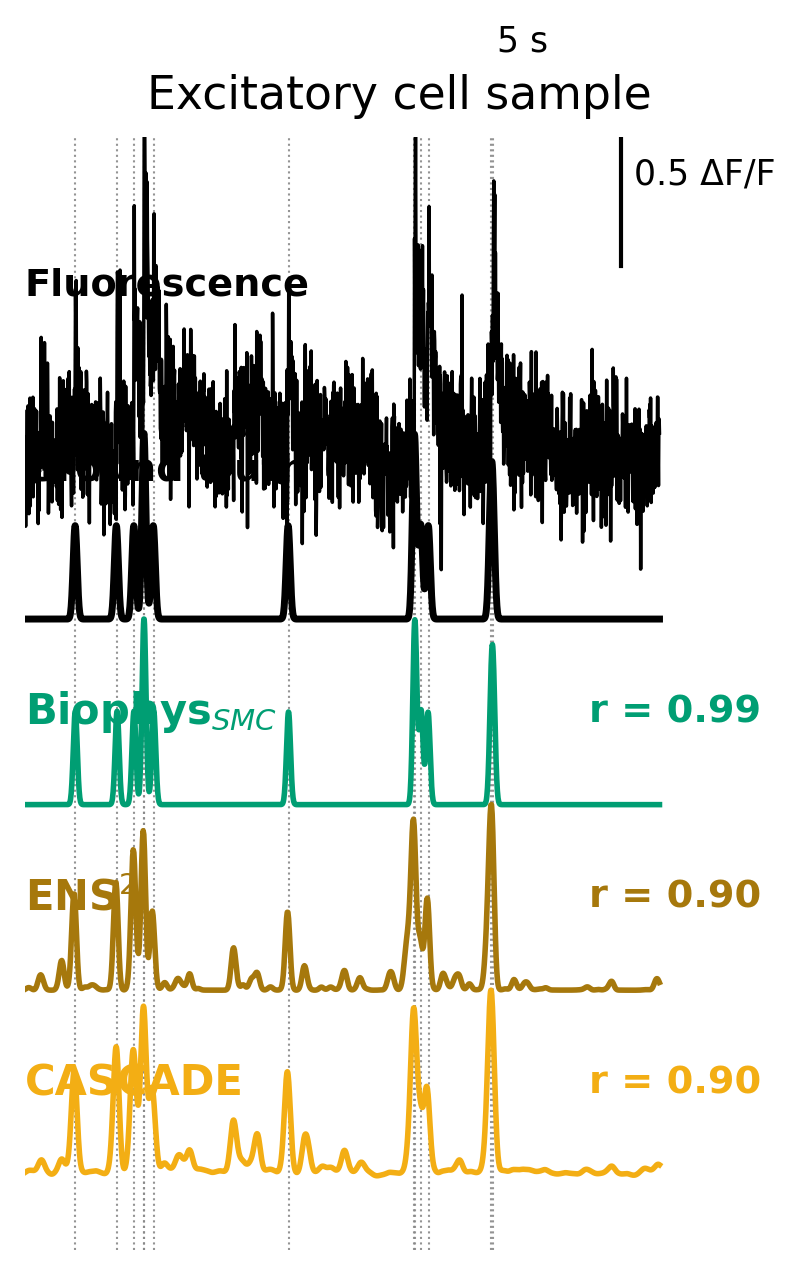

In [12]:
from c_spikes.viz.trialwise_plots import plot_trace_panel

fig, ax, meta = plot_trace_panel(
    csv_path=csv_path,
    eval_root=REPO_ROOT / "results" / "full_evaluation",
    data_root=REPO_ROOT / "data" / "janelia_8m" / "excitatory",
    edges_path=REPO_ROOT / "results" / "excitatory_jG8m_edges_2000pts.npy",
    dataset="jGCaMP8m_ANM472179_cell02",
    smoothing="raw",
    corr_sigma_ms=50.0,
    duration_s=16.0,
    # PGAS outputs often live under a different run tag than ENS2/CASCADE.
    run_by_method=[
        "pgas=pgasraw",
        "ens2=cascadein_nodisc_ens2",
        "cascade=cascadein_nodisc_ens2",
    ],
)
meta


In [ ]:
# Save figures (optional)
out_dir = REPO_ROOT / "results"
out_dir.mkdir(parents=True, exist_ok=True)

corr_out = out_dir / "trialwise_corr_vs_sigma.png"
trace_out = out_dir / "trialwise_trace_panel.png"

# The last-created `fig` is the trace panel; re-run the correlation cell if you want both in one go.
fig.savefig(trace_out, dpi=300)
trace_out
